In [9]:
%matplotlib inline

import pandas as pd
import re
import copy
from collections import Counter

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import MDS
from sklearn.cluster import KMeans

from IPython.display import Image

import nltk
from nltk.stem.snowball import SnowballStemmer

In [10]:
import numpy as np

#because my version of pandas is different than the version that descriptions.pkl was created with
with open("descriptions.txt") as desc:
    descriptions = desc.readlines()
titles = []
descs = []
tempDesc = ''
for description in descriptions:
    if description[0].isnumeric():
        titles.append(description[4:-1])
    elif description == '\n':
        descs.append(tempDesc)
        tempDesc = ''
    else:
        tempDesc += description[:-1]
descs.append(tempDesc)

titles = pd.read_csv("full_performance_names.csv",header=None)
titles = np.ravel(titles[[1]])

In [11]:
stemmer = SnowballStemmer('english')

# tokenize words in docs
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [12]:
# Extract bigram matrix
tokenizedDescs = []
temp = [tokenize_and_stem(d) for d in descs]
for desc in temp:
    sb = ""
    for s in desc:
        sb += s
        sb += " "
    tokenizedDescs.append(sb)
    
vect = CountVectorizer(ngram_range=(1, 1), stop_words = ENGLISH_STOP_WORDS, min_df = 5)
X = vect.fit_transform(tokenizedDescs)

In [13]:
topics = np.ravel(pd.read_pickle('categories.pkl'))[:-1]
topics

array(['Theater', 'Chamber', 'Orchestra', 'Orchestra', 'Orchestra',
       'Orchestra', 'Chamber', 'Dance', 'Orchestra', 'Chamber',
       'Orchestra', 'Orchestra', 'Orchestra', 'Chamber', 'Chamber',
       'Other', 'Chamber', 'Theater', 'Other', 'Chamber', 'Orchestra',
       'Chamber', 'Orchestra', 'Orchestra', 'Chamber', 'Chamber',
       'Chamber', 'Choral', 'Chamber', 'Choral', 'Orchestra', 'Dance',
       'Chamber', 'Choral', 'Theater', 'Chamber', 'Chamber', 'Theater',
       'Theater', 'Choral', 'Choral', 'Chamber', 'Other', 'Dance',
       'Theater', 'Other', 'Theater', 'Dance', 'Other', 'Chamber', 'Dance',
       'Theater', 'Other', 'Other', 'Theater', 'Choral', 'Chamber',
       'Chamber', 'Chamber', 'Dance', 'Chamber', 'Jazz', 'Other', 'Dance',
       'Other', 'Other', 'Jazz', 'Choral', 'Jazz', 'Theater', 'Jazz',
       'Jazz', 'Other', 'Other', 'Other', 'Other', 'Dance', 'Orchestra',
       'Other', 'Chamber', 'Other', 'Chamber', 'Jazz', 'Other', 'Theater',
       'Other', 

In [14]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X.todense())

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
X_new = model.fit_transform(X_pca)

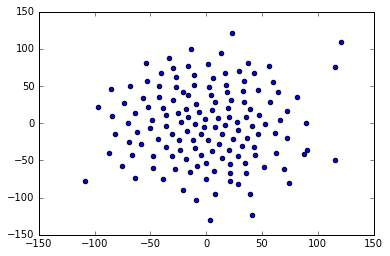

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X_new[:,0], X_new[:,1])

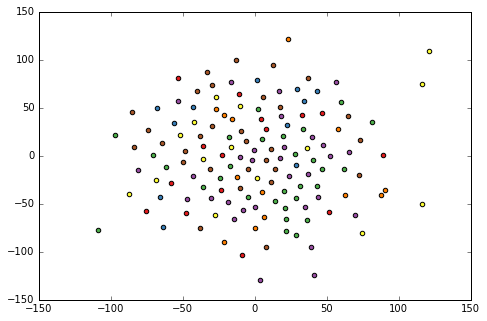

In [16]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

xs = X_new[:,0]
ys = X_new[:,1]

colors = {"Orchestra":"#e41a1c","Chamber":"#984ea3","Jazz":"#377eb8","Theater":"#4daf4a","Dance":"#ff7f00",
         "Choral":"#ffff33","Other":"#a65628"}

for i in ['Theater','Chamber','Orchestra','Dance','Other','Jazz','Choral']:
    cluster_x = []
    cluster_y = []
    for j in range(len(topics)):
        if topics[j] == i:
            cluster_x.append(cluster_x.append(xs[j]))
            cluster_y.append(cluster_y.append(ys[j]))
    plt.scatter(cluster_x, cluster_y,c=colors[i], s=20)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(ngram_range=(1,3),stop_words = ENGLISH_STOP_WORDS, min_df = 2)
X = vect.fit_transform(tokenizedDescs)

In [18]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X.todense())

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
X_new = model.fit_transform(X_pca)

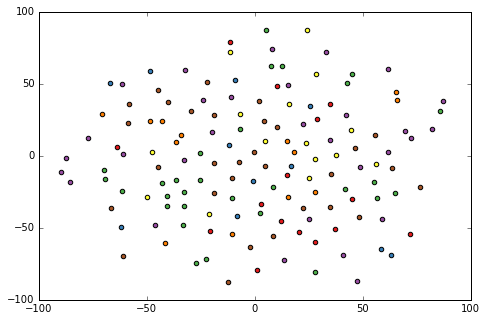

In [19]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

xs = X_new[:,0]
ys = X_new[:,1]

colors = {"Orchestra":"#e41a1c","Chamber":"#984ea3","Jazz":"#377eb8","Theater":"#4daf4a","Dance":"#ff7f00",
         "Choral":"#ffff33","Other":"#a65628"}

for i in ['Theater','Chamber','Orchestra','Dance','Other','Jazz','Choral']:
    cluster_x = []
    cluster_y = []
    for j in range(len(topics)):
        if topics[j] == i:
            cluster_x.append(cluster_x.append(xs[j]))
            cluster_y.append(cluster_y.append(ys[j]))
    plt.scatter(cluster_x, cluster_y,c=colors[i], s=20)

In [20]:
topicModel = pd.read_csv("wikipediaTopicModel1.csv")

In [21]:
topicModelDropped = topicModel.drop(["Unnamed: 0","showId"],axis=1)

In [22]:
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
X_new = model.fit_transform(topicModelDropped)

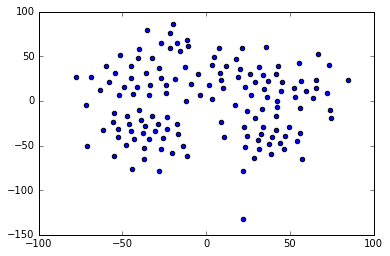

In [23]:
plt.scatter(X_new[:,0], X_new[:,1])

In [25]:
np.ravel(topicModel[['showId']])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143])

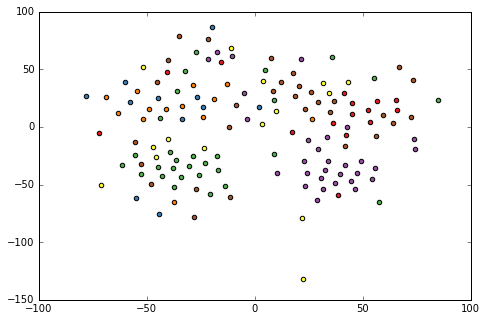

In [27]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

xs = X_new[:,0]
ys = X_new[:,1]

colors = {"Orchestra":"#e41a1c","Chamber":"#984ea3","Jazz":"#377eb8","Theater":"#4daf4a","Dance":"#ff7f00",
         "Choral":"#ffff33","Other":"#a65628"}

for i in ['Theater','Chamber','Orchestra','Dance','Other','Jazz','Choral']:
    cluster_x = []
    cluster_y = []
    for j in range(len(topics)):
        if topics[np.ravel(topicModel[['showId']])[j]] == i:
            cluster_x.append(cluster_x.append(xs[j]))
            cluster_y.append(cluster_y.append(ys[j]))
    plt.scatter(cluster_x, cluster_y,c=colors[i], s=20)
    
plt.savefig('cluster.png', dpi=200)

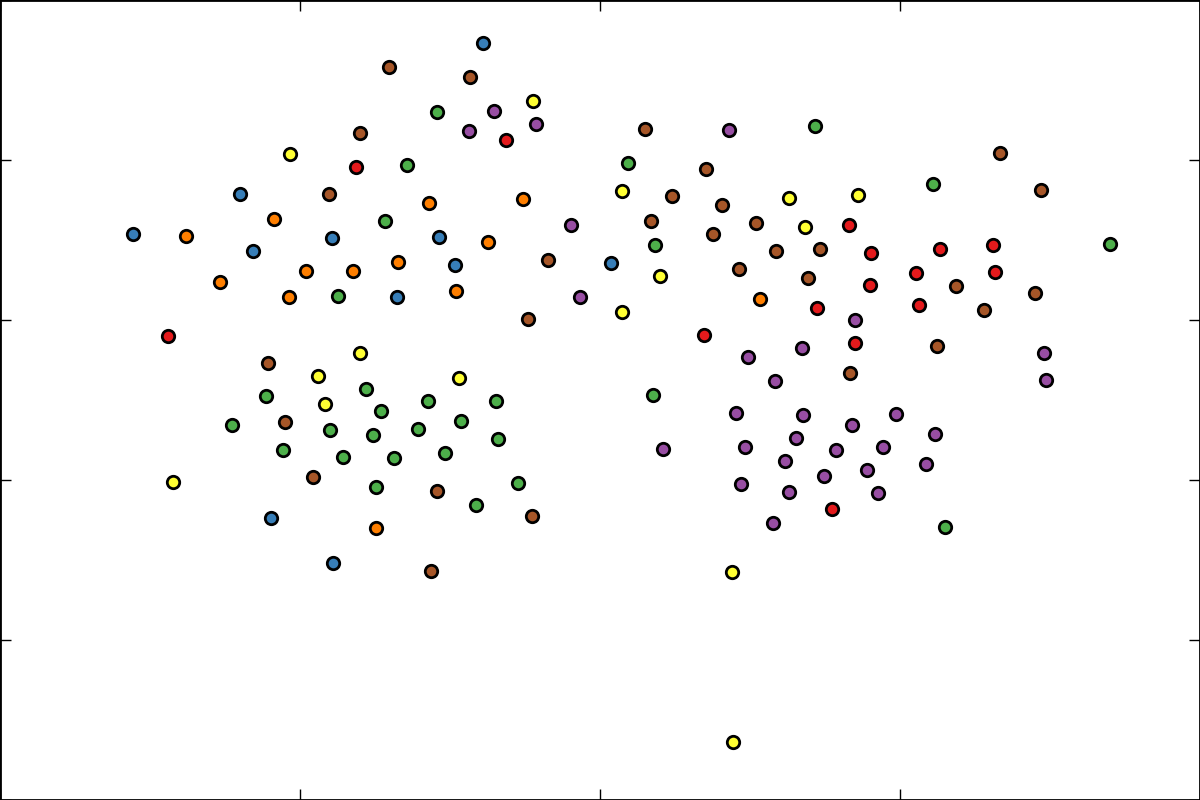

In [28]:
Image('cluster.png')